# Linear Systems
## Overview of Linear Algebra

In the last course, we explored the framework of **calculus** and used it to:

* understand the slope of linear functions
* understand the derivative (slope as a function) of nonlinear functions
* find extreme values in nonlinear functions

While we learned the basics of slope through linear functions, we primarily focused on nonlinear functions in the last course.<br>

In this course, we'll focus on understanding linear functions. Specifically, we'll explore the framework of **linear algebra**, which provides a way to represent and understand the solutions to systems of linear equations. A **system of linear equations** consists of multiple, related functions with a common set of variables. The word **linear equation** is often used interchangeably with **linear function**. Many real world processes can be modeled using multiple, related **linear equations**. We'll start by exploring a concrete example of a linear system, another word for system of linear equations, before we dive further into linear algebra.<br>

#### Optimal Salary Problem
Let's say we have to pick between 2 different job offers. The first job offer has a base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as $y=1000+30x$, where $y$ represents dollars earned that week and x represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as $y=100+50x$, where $y$ also represents dollars earned that week and x also represents hours worked that week.<br>

We want to understand which job offer is better. If we know exactly the amount of money we'd like to make each week ($y$), we can substitute that value into both equations and solve for $x$ to identify which job will require us to work less hours. If we know exactly the number of hours we want to work each week ($x$), we can substitute that value into both equations and solve for $y$ to identify which job will make us more money for the same amount of hours worked.<br>

Instead, if we want to understand:

* At what number of hours worked can we expect to make the same amount of money at either job?
* How many hours do we have to work to make more money at the first job than the second job?

To answer the first question, we need to find the x value where both the y values are equivalent. Once we know where they intersect, we can easily find out the answer to the second question.<br>

Let's start by visualizing both of these equations on a plot and gaining a visual intuition for where they intersect.

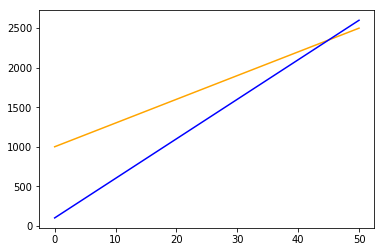

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,50,1000)
y1 = 30*x + 1000
y2 = 50*x + 100

plt.plot(x, y1, c='orange')
plt.plot(x, y2, c='blue')
plt.show()

## Solving Linear Systems By Elimination

From the plot we generated in the last screen, we can tell that both functions intersect at somewhere near the point $(45,2200)$.

![](https://s3.amazonaws.com/dq-content/160/visual_solution.svg)

This point where both equations intersect is known as a **solution** to the system, because substituting for x and y into both functions in the system makes both of them true. Said another way, plugging in the x value of the solution into both functions yields the same **y** value.<br>

Let's explore how to solve this system by hand. Because both functions share the same variables, we can represent one of the variables, say y, in terms of the other variable and solve for the x value. Then, we can substitute this x value into either equation to determine the y value. This process is known as **solving by elimination** or the **elimination method**. Let's walkthrough how to apply this process to our system.<br>

First, we'll substitute y in the second function with the first function:

![](https://s3.amazonaws.com/dq-content/160/solve_elimination_1.svg)

Note that order isn't important and we could have also substituted $y$ in the first function with the second function. Now that we know that $x=45$, we can substitute this into either equation to determine $y$.

![](https://s3.amazonaws.com/dq-content/160/solve_elimination_2.svg)

The solution to our system is $(45,2350)$. This means that if we work exactly $45$ hours a week, we'll make the same amount of money at either job: $2350$.<br>

While we can solve a linear system like this by hand using arithmetic, we can't use the same technique to solve much more complex systems. Many real world systems are modeled using many more than 2 variables and functions and solving by hand is unfeasible.<br>

Those types of systems can be solved using **linear algebra** using a variation of arithmetic elimination called **Gaussian elimination**. We'll walkthrough how to perform Gaussian elimination in the rest of this mission to find a solution to our linear system.

## Representing Functions In General Form

Linear algebra provides a way to represent a linear system compactly, known as a **matrix**, and a set of rules for manipulating that representation, also known as an **algebra**. A matrix uses rows and columns to represent only the coefficients in a linear system and it's similar to the way data is represented in a spreadsheet or a dataframe. Before we can represent our system in a matrix, we need to rearrange each of our functions into the **general form**.<br>

In the last course, we primarily explored linear functions in [point-slope form](https://en.wikipedia.org/wiki/Linear_equation#Point.E2.80.93slope_form):

$$y=mx+b$$

In linear algebra, we usually represent linear functions in the [general form](https://en.wikipedia.org/wiki/Linear_equation#General_.28or_standard.29_form):

$$Ax+By=c$$

In the general form, the variables and their coefficients are on the left side, while the constant term is on the right side. We can switch from point-slope form to the general form by rearranging the terms:

$$mx−y=−b$$

Here's what the first function looks like in general form:

$$30x−y=−1000$$

Here's what the second function looks like in general form:

$$50x−y=−100$$

To represent both linear functions in a system, we use an **augmented matrix**:

$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

In an augmented matrix, the coefficients from the left sides of the functions are on the left side of the bar (`|`), while the constants from the right sides of the functions are on the right side. An augmented matrix allows us to represent a linear system using just the real number coefficients and constants.<br>

Here's a summary of the 3 different representations of the linear system we just discussed:

![](https://s3.amazonaws.com/dq-content/160/equation_to_matrix.svg)

In the next screen, we'll walkthrough how to represent this augmented matrix in NumPy. In later screens, we'll learn the rules of matrix manipulation and how to apply them to arrive at the system's solution.

## Representing An Augmented Matrix in Numpy

To represent an augmented matrix, we can use the [numpy.asarray()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) function and pass in each row as a list, from the top row to the bottom row. The following code represents a 2 row by 3 column matrix containing all 0's:

```python
matrix_one = np.asarray([
    [0, 0, 0],
    [0, 0, 0]  
])
```

Because we'll be performing addition, subtraction, multiplication, and division operations using the values in this matrix, we need to set the type to `float32` to preserve precision.

```python
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]  
], dtype=np.float32)
```

We'll dive more into those operations in the next screen.

* Create a NumPy 2D array representation of our augmented matrix:

$$
\left[
\begin{array}{rr|r}
30 & -1 & -1000 \\
50 & -1 & -100
\end{array}
\right]
$$

* Assign the resulting `numpy.ndarray` object to `matrix_one`.

In [2]:
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]
], dtype=np.float32)

matrix_one

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)

## Matrix Representation Of The Solution

The important question now is, how do we arrive at the same solution we did earlier in the mission by arithmetic? Earlier in the mission, we used arithmetic to calculate the solution to the system and represented it as a coordinate pair: $(45,2350)$. Here's how we represent the solution when we're working with the matrix representation:

$$
\left[\begin{array}{rr|r}
1 & 0 & 45 \\
0 & 1 & 2350
\end{array}
\right]
$$

When we convert this matrix back into equations in the standard form, you'll notice that this corresponds to the same solution:

![](https://s3.amazonaws.com/dq-content/160/matrix_to_equation.svg)

To solve a linear system, we need to perform a series of transformations to try to evolve the matrix into this form (where the solution is presented). Not all linear systems have solutions, however, and we'll explore this in further detail throughout this course.


## Row Operations

To preserve the relationships in the linear system, we can only use the following **row operations**:

![](https://s3.amazonaws.com/dq-content/160/matrix_row_operations.svg)

While these may seem new, these row operations are the same allowed operations we can perform when the functions are in equation form. Before we dive into how to solve our linear system using these row operations, let's practice performing these transformations in `NumPy`.<br>

To swap 2 rows in a NumPy `ndarray` object, we need to use double bracket notation to specify the row ordering change:

```python
matrix =  np.asarray([
    [1, 3],
    [50, 2]  
], dtype=np.float32)
# Swap the second row (at index value 1) with the first row (at index value 0).
matrix = matrix[[1,0]]
```

To multiply a row by a nonzero constant, we select the row, use the `*` operator to multiply all of the values by a scalar value, and then assign the transformed row back:

```python
# Multipy the second row by 2.
matrix[1] = 2*matrix[1]
```

To add one row to another row, we need to add both rows then assign it back to row we want to overwrite:

```python
# Add the second row to the first row.
matrix[1] = matrix[1] + matrix[2]
```

Lastly, we can combine and chain these rules to perform more complex row transformations:

```python
matrix[1] = 0.5*matrix[2] + matrix[1] + matrix[3]
```

Note that you can't multiply or divide rows.

* Divide the first row from `matrix_one` by `30`.

In [3]:
matrix_one[0] = matrix_one[0]/30

## Simplifying Matrix To Echelon Form

To find the solutions of a matrix, there are 2 main steps we need to take. The first step is to rearrange the matrix into **echelon form**. In this form, the values on the diagonal locations are all equal to 1 and the values below the diagonal are all equal to `0`.

$$\left[
\begin{array}{rr|r}
1&?&? \\
0&1&?
\end{array}
\right]
$$

First let's divide the first row by 30 so that the diagonal value on the first row becomes `1`:
![](https://s3.amazonaws.com/dq-content/160/echelon_one.svg)

Then, let's subtract 50 times the first row from the second row:
![](https://s3.amazonaws.com/dq-content/160/echelon_two.svg)

We'll leave it to you to perform the last transform to get the matrix into echelon form.


In [5]:
matrix_one[1] = matrix_one[1] - (matrix_one[0]*50)
matrix_one

array([[  1.00000000e+00,  -3.33333351e-02,  -3.33333321e+01],
       [  0.00000000e+00,   6.66666746e-01,   1.56666663e+03]], dtype=float32)

## Row Reduced Echelon Form

The second step is to rearrange the matrix into **row reduced echelon form**. This is the form that we mentioned earlier where the solution is exposed to us:

$$\left[
\begin{array}{rr|r}
1&0&? \\
0&1&?
\end{array}
\right]
$$

The two question marks (`?`), which we still need to determine, represent the x and y values that solve our system. In the last step, we brought the matrix one transformation away from row reduced echelon form:

![](https://s3.amazonaws.com/dq-content/160/echelon_three.svg)

The only step that's left is to zero out the second value in the first row. We'll leave that to you to finish.

In [6]:
matrix_one[1] = matrix_one[1] * (3/2)
matrix_one

array([[  1.00000000e+00,  -3.33333351e-02,  -3.33333321e+01],
       [  0.00000000e+00,   1.00000012e+00,   2.35000000e+03]], dtype=float32)

In [7]:
matrix_one[0] = matrix_one[1] + matrix_one[0]*30
matrix_one

array([[  3.00000000e+01,   1.19209290e-07,   1.35000000e+03],
       [  0.00000000e+00,   1.00000012e+00,   2.35000000e+03]], dtype=float32)

In [8]:
matrix_one[0] /= 30

In [12]:
matrix_one = matrix_one.astype(int)
matrix_one

array([[   1,    0,   45],
       [   0,    1, 2350]])

## Next Steps

In most real world situations, the dependent variable $y$ is connected to multiple independent variables, not just a single one $x$. To represent those functions, we'll need to work with a different version of the general form:

$$a_{1}x_{1}+a_{2}x_{2}+a_{3}x_{3}+...+a_{n}x_{n}=c$$

In this form, $a_{1}...a_{n}$ are the coefficients and $c$ is a constant value.

![](https://s3.amazonaws.com/dq-content/160/higher_order_system.svg)

If we have a system with more than 3 variables, we can't visualize it easily. In addition, performing Gaussian elimination becomes much more painful to do as well. In the next few missions, we'll develop more of the theory and geometric intuition behind linear algebra and build on that to solve these higher order linear systems.